# Métodos de agrupamiento

En este ejercicio, aplicaremos los conceptos vistos en clase referentes a métodos de agrupamiento no supervisados. Específicamente, explorarás el uso de KMeans y DBScan usando la librería de scikit-learn.

In [187]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
random_state = 0 # Fijamos la semilla aleatoria para que siempre den los mismos datos
np.random.seed(random_state)
# Podemos establecer los colores con los que se graficará con matplotlib
# utilizando un cmap distinto
matplotlib.rc('image', cmap='nipy_spectral')

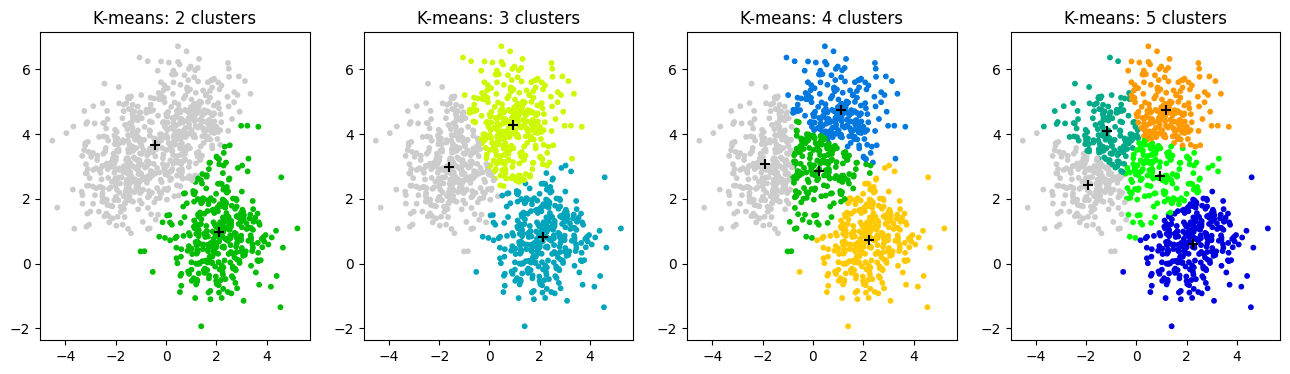

In [188]:
# Generaremos 3 blobs, cada uno con datos iguales. En total habran 1000 puntos distribuidos en estos blobs.
n_samples = 1000
X, _ = datasets.make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# Utilizaremos el algoritmo de KMeans para encontrar clusters en los datos
n_cols = 4
n_clusters_list = [2, 3, 4, 5]
rows = len(n_clusters_list) // n_cols
fig, axes = plt.subplots(rows, n_cols, figsize=(4*n_cols, 4))
axes = axes.flatten()
for ax, n_clusters in zip(axes, n_clusters_list):
    # TODO: Encuentra los clusters utilizando el algoritmo de KMeans implementado en scikit-learn
    # ====== Start of solution =====
    model = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X)
    # ====== End of solution =====
    # con centers obtenemos los centroides de los clusters
    centers = model.cluster_centers_

    # TODO: Grafica los datos usando scatter, recuerda que X = (x, y)
    # ====== Start of solution =====
    ax.scatter(X[:, 0], X[:, 1], s=10, c=model.labels_, vmin=-1)
    # ====== End of solution =====

    # Graficamos los centroides
    ax.scatter(centers[:, 0], centers[:, 1], marker="+", s=60, c='k')

    ax.set_title(f"K-means: {n_clusters} clusters")
plt.show()

En la sección anterior utilizamos 2, 3, 4 y 5 clusters para encontar patrones en los datos y los resultados se graficaron.

TODO: Contesta la siguiente pregunta

- ¿Cúal propuesta de clusters consideras la mejor y porqué? 3 clusters, ya que se pueden observar 3 grupos distintos en los datos.

# Evaluando el desempeño del algoritmo

En el algoritmo de K-means debemos seleccionar la cantidad de clusters para poder hacer fit al modelo. 

Para decidir cuantos clusters utilizar podemos evaluar visualmente o hacer un análisis cuantitativo. Una estrategia común para realizar el análisis consiste en entrenar modelos con multiples propuestas de k-clusters y seleccionar la propuesta con el mejor rendimiento. Para ello se debe utilizar una métrica que evalúe el desempeño del algoritmo, silhouette score es una métrica muy útil para este objetivo que consiste en medir la distancia intra-cluster e inter-cluster, un buen cluster es considerado aquel que tiene una pequeña distancia promedio intra-cluster y que se encuentra muy separado de los demas clusters, un acomodo con buenos clusters tendrá un silhoute score cercano a 1 y una mala selección de clusters tendrá un score cercano -1. 

En la siguiente sección seguiremos esta estrategia para saber cuantos clusters existe en los datos provistos.

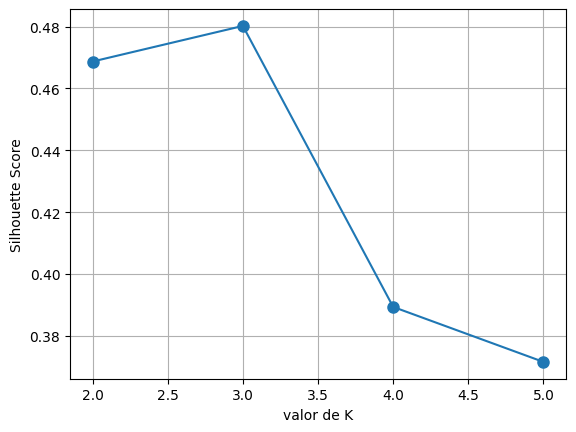

In [189]:
from sklearn.metrics import silhouette_score

Ks = range(2,6)
scores = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    # TODO: Obten el silhouete score de nuestro modelo
    # ====== Start of solution =====
    score = silhouette_score(X, kmeans.labels_)
    # ====== End of solution =====
    scores.append(score)

plt.plot(Ks,scores,'-o', markersize=8)
plt.xlabel("valor de K")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

### TODO: Contesta la siguiente pregunta

De acuerdo al silhouete score
- ¿Qué sería mejor, elegir 4 o 5 clusters?
4 ya que con este se tiene un score más alto que con 5.

- ¿Cuántos clusters se deberían utilizar para entrenar el algoritmo? ¿Concuerda con tu selección realizada tras visualizar los datos?
Viendo los datos pareciera que con 3 clusters puede ser suficiente.

# Rompiendo las asunciones de K-Means

K-means es un algoritmo que funciona en base a algunas asunciones que pueden no siempre ser ciertas, en esta seccion analizaremos algunos casos en los cuales el K-means puede que no genere la solución esperada.

In [190]:
n_samples=200
# =============================================================================
# Generamos diferentes conjuntos de datos que rompen las asunciones de K-Means
# =============================================================================
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
# Blobs con varianzas variadas
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# Cada dataset es un tuple (datos, etiquetas)
datasets = {"Circulos": noisy_circles,
            "Lunas": noisy_moons, 
            "Blobs": blobs, 
            "Varianzas diferentes": varied,
            # "Aleatorio": no_structure,
            "Datos anisotrópicos": aniso}

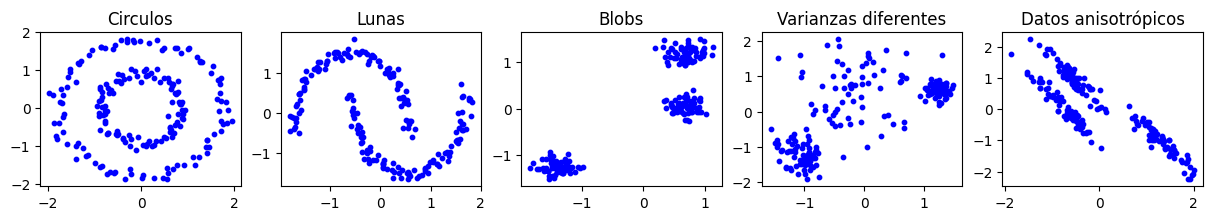

In [191]:
# ============
# Graficamos los datos
# ============
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
for (name, data), ax in zip(datasets.items(), axs):
    X, _ = data
    # Normalizamos los datos para que todos estén en la misma escala
    X = StandardScaler().fit_transform(X)
    # TODO: Grafica los datos usando scatter
    # ====== Start of solution =====
    ax.scatter(X[:,0], X[:,1], s=10, c='b')
    # ====== End of solution =====
    ax.set_title(name)    

Aplica K-means a cada uno de los datasets anteriores

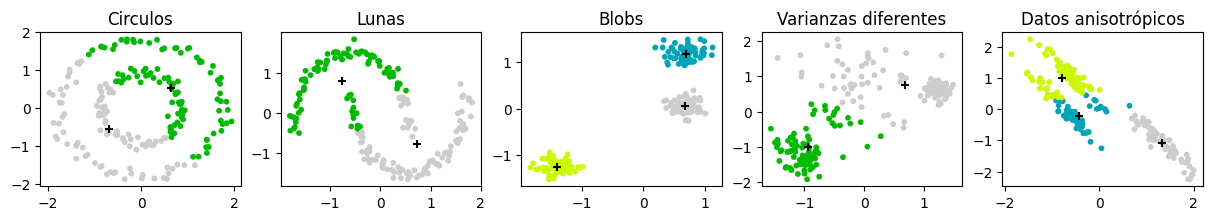

In [192]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
# TODO: Modifica la cantidad de clusters para cada dataset hasta que encuentres un resultado que te satisfaga
n_clusters = {"Circulos": 2,
              "Lunas": 2,
              "Blobs": 3,
              "Varianzas diferentes": 2,
              "Datos anisotrópicos": 3}
for (name, data), n, ax in zip(datasets.items(), n_clusters.values(), axs):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    # TODO: Aplica K-means para encontrar los clusters y los centros de cada cluster
    # Después modifica los hiperparámetros en n_clusters según consideres apropiado para cada dataset
    # ====== Start of solution =====
    kmeans = KMeans(n_clusters=n, random_state=random_state).fit(X)
    centers = kmeans.cluster_centers_
    # ====== End of solution =====
    ax.scatter(X[:, 0], X[:, 1], s=10, c=kmeans.labels_, vmin=-1)
    ax.scatter(centers[:, 0], centers[:, 1], marker="+", s=30, c='k')

# DBScan
DBScan es otro método de agrupamiento que encuentra clusters que funciona a través de densidad local.
Aplica DBScan a cada uno de los datasets anteriores y compara los resultados con los de K-Means

Clusteres en Circulos [0 1]
Clusteres en Lunas [0 1 2 3]
Clusteres en Blobs [0 1 2]
Clusteres en Varianzas diferentes [0]
Clusteres en Datos anisotrópicos [-1  0  1  2]


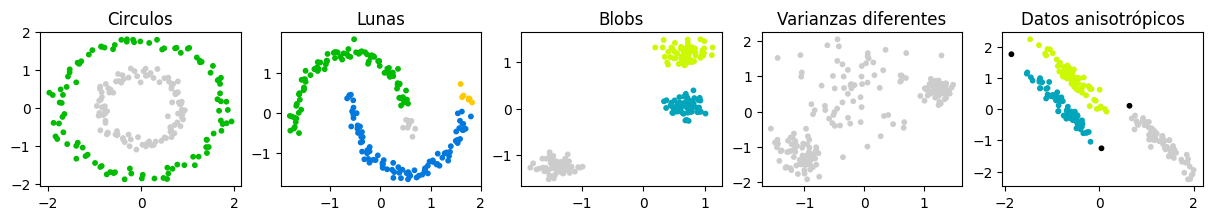

In [193]:
n_rows = 1
n_cols = len(datasets)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2))
axs = axs.flatten()
# TODO: Modifica los hiper parámetros de dbscan hasta encontrar un resultado que te satisfaga
params = {"Circulos": {"eps": 0.3, "min_samples": 3},
          "Lunas": {"eps": 0.3, "min_samples": 3},
          "Blobs": {"eps": 0.5, "min_samples": 5},
          "Varianzas diferentes": {"eps": 0.7, "min_samples": 5},
          "Datos anisotrópicos": {"eps": 0.3, "min_samples": 3}}
for i, ((name, data), ax) in enumerate(zip(datasets.items(), axs)):
    X, _ = data
    X = StandardScaler().fit_transform(X)
    ax.set_title(name)
    eps = params[name]['eps']
    min_samples = params[name]['min_samples']
    # TODO: Aplica DBSCAN para encontrar los clusters
    # Después modifica los hiperparámetros en n_clusters según consideres apropiado para cada dataset
    # ====== Start of solution =====
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    # ====== End of solution =====
    print(f"Clusteres en {name}", np.unique(labels))
    ax.scatter(X[:, 0], X[:, 1], s=10, c=labels, vmin=-1)

### TODO: Contesta la siguiente pregunta
- ¿Qué diferencia encuentras entre los clusters encontrados con DBSCAN y los clusters encontrados con K-Means? DBScan puede encontrar cualquier tipo de clusters a diferencia de K-Means que necesita encontrar clusters del mismo tamaño y que necesita que se especifique la cantidad previamente.
- ¿Qué metodo clasifica mejor los clusters de Lunas y a qué crees que se deba? DBScan por la forma compleja ya que a diferencia de K-Means no se limita por la forma.
- ¿Qué son los puntos negros encontrados con DBSCAN? Son puntos que no pertenecen a ningún cluster; ruido.
- ¿En qué casos crees que sea recomendable utilizar K-means sobre DBSCAN? Donde hay gran cantidad de datos y cuando los clusters son circulares y del mismo tamaño.